In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# df = pd.read_csv("data/final_data_one_hot.csv")
# df.head(3)

In [103]:
df = pd.read_csv("data/final_data_min_lists.csv")
df.head(3)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,119.0,53.0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,115,2,334.0,676.0,903.0
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,490,5,58.0,201.0,279.0
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,53,1,514.0,573.0,1881.0


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import ast
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(r2)


0.29104670784553754


In [106]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

# model = LogisticRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(accuracy_score(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_errors = []
mse_errors = []
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)


  mae_errors.append(mae)
  mse_errors.append(mse)

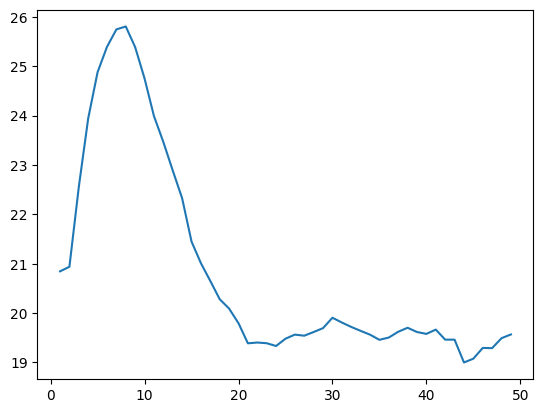

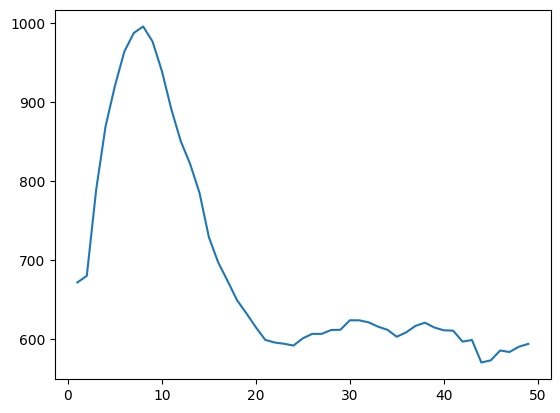

In [108]:
plt.plot(range(1, 50), mae_errors)
plt.show()
plt.plot(range(1, 50), mse_errors)
plt.show()

In [109]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [110]:
data = {
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # it looks like production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG', # not final but likely
  'runtime': '100', # runtime not released yet, so use average
}

In [111]:
import json

with open('data/director_encoding.json', 'r') as file:
    director_encoding = json.load(file)

with open('data/actor_encoding.json', 'r') as file:
    actor_encoding = json.load(file)

with open('data/production_company_encoding.json', 'r') as file:
    production_company_encoding = json.load(file)

columns = df.drop('audience_rating', axis=1).columns

def encode(data):

  new_row = {}

  if 'directors' in data:
    min_director = float('inf')
    for director in data['directors']:
      if director in director_encoding:
        encoding = director_encoding[director]
        min_director = min(min_director, encoding)
    new_row[f'directors'] = min_director
  else:
    new_row[f'directors'] = max(director_encoding.values()) + 1

  if 'actors' in data:
    actors = list(map(lambda actor: actor_encoding[actor] if actor in actor_encoding else max(actor_encoding.values()) + 1, data['actors']))
    actors = sorted(actors)
    if len(actors) > 0:
      new_row[f'actors1'] = actors[0]
    else:
      new_row[f'actors1'] = max(actor_encoding.values()) + 1
    if len(actors) > 1:
      new_row[f'actors2'] = actors[1]
    else:
      new_row[f'actors2'] = max(actor_encoding.values()) + 1
    if len(actors) > 2:
      new_row[f'actors3'] = actors[2]
    else:
      new_row[f'actors3'] = max(actor_encoding.values()) + 1
  else:
    new_row[f'actors1'] = max(actor_encoding.values()) + 1
    new_row[f'actors2'] = max(actor_encoding.values()) + 1
    new_row[f'actors3'] = max(actor_encoding.values()) + 1

  if 'production_company' in data and data['production_company'] in production_company_encoding:
      encoding = production_company_encoding[data['production_company']]
      new_row[f'production_company'] = encoding
  else:
    new_row[f'production_company'] = max(production_company_encoding.values()) + 1
  
  if 'genres' in data:
    for genre in data['genres']:
      if genre in columns:
        new_row[genre] = 1

  if 'content_rating' in data:
    content_rating = data['content_rating']
    if content_rating in columns:
      new_row[content_rating] = 1

  if 'runtime' in data:
     new_row['runtime'] = data['runtime']

  print(new_row)
  new_row = pd.DataFrame(new_row, index=[0])
  new_row = new_row.reindex(columns=columns, fill_value=0)

  return new_row
    
  # df = pd.concat([new_df, new_row], ignore_index=True)

new_data = encode(data)

new_data

{'directors': 281, 'actors1': 102, 'actors2': 769, 'actors3': 1847, 'production_company': 1, 'Kids & Family': 1, 'Action & Adventure': 1, 'Science Fiction & Fantasy': 1, 'PG': 1, 'runtime': '100'}


,runtime,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,Anime & Manga,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,100,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,281,1,102,769,1847


In [112]:
new_pred = knn.predict(new_data)

new_pred

array([63.])